# Task 1: Linear Regression Task - African Education Access Prediction

**Objective:**

You will be working on linear regression algorithms in the following tasks, focusing on a specific use case.

**Use Case:**

* Find a use case that aligns with your mission.
* **Important:**
    * The use case must **NOT** be generic.
    * The use case must **NOT** be the house prediction use case (covered extensively in class). Choosing this use case will result in an immediate zero grade for the entire assignment.

**Tasks:**

1. **Find a Dataset:**
   * Find a dataset related to your chosen use case.
   * Explore sources like Kaggle, Google Datasets, and data.gov.
   * The dataset **MUST** be something other than house price prediction.

2. **Build and Optimize a Linear Regression Model:**
   * Create and optimize a linear regression model using gradient descent.
   * Utilize the scikit-learn library.

3. **Plot the Loss Curve:**
   * Plot the loss curve for both test and train data.

4. **Compare Models:**
   * Compare the performance of:
      * Linear regression model
      * Decision trees
      * Random forest
   * Include the code for all three models.

5. **Save the Best Model:**
   * Save the best-performing model based on the loss metric.

6. **Create a Prediction Script:**
   * Create a script that uses the best model to make a prediction that will be used in Task 2.

## Use Case: Predicting Optimal Education Access for Disabled People in Africa

**Goal:** Predicting optimal educational accessibility and resource allocation for African countries using European educational infrastructure data as a reference model to provide actionable insights for African policymakers.

**Why This Use Case?**

This use case is directly aligned with my mission in inclusive education for Africa, which is to improve educational access for disabled people across the continent. Predicting education access helps in:

* Identifying African regions and demographics that require additional educational support and intervention.
* Enabling data-driven policy decisions for educational accessibility in Africa.
* Understanding how European educational patterns can inform African educational development.
* Providing evidence-based recommendations for resource allocation in African educational systems.

**Why is this Use Case Non-Generic?**

This use case focuses on leveraging European educational infrastructure data to solve specific African educational challenges. It targets policy interventions for disabled individuals' educational success in Africa, which is critical for data-driven decision-making in African educational policy contexts. The approach uses external data (European) to solve an African problem, meeting the assignment requirements.

## European Education Access Data as Reference Model for Africa

This dataset contains comprehensive information on access to education for disabled people across Europe, which we use as a reference model to predict and improve educational accessibility in African countries.

## Dataset Description

**Unit of Measurement**

* **unit:** Unit of measurement (THS = Thousands)

**Education Details**

* **isced97:** International Standard Classification of Education (ISCED) levels:
    * ED0-2: Pre-primary to lower secondary education
    * ED3_4: Upper secondary and post-secondary non-tertiary education
    * ED5_6: Tertiary education
    * NRP: Not reported

**Health Problem Classification**

* **hlth_pb:** Health problem categories:
    * PB1040: Basic activity difficulties (seeing)
    * PB1041: Basic activity difficulties (hearing)
    * PB1070: Basic activity difficulties (walking)
    * PB1071: Basic activity difficulties (remembering)

**Demographic Details**

* **sex:** Gender classification:
    * F: Female
    * M: Male
    * T: Total (both genders)
* **age:** Age groups:
    * Y15-24: 15-24 years
    * Y25-34: 25-34 years
    * Y35-44: 35-44 years
    * Y45-54: 45-54 years
    * Y55-64: 55-64 years
    * TOTAL: All age groups

**Temporal and Geographic Details**

* **time:** Year of data collection (2011-2020)
* **geo:** Geographic location (European country codes)
* **value:** Number of people (in thousands)

**How This Data Helps African Education:**

1. **Reference Patterns:** European data shows what works in developed educational systems
2. **Benchmarking:** Provides targets for African educational development
3. **Resource Planning:** Helps predict what African countries need based on similar demographics
4. **Policy Guidance:** Identifies which European educational approaches could work in Africa

**Sourced from:** [Kaggle: Access to Education of Disabled People in Europe](https://www.kaggle.com/datasets/gpreda/access-to-education-of-disabled-people-in-europe)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# Load the dataset
df = pd.read_csv('Access to Education Disabled People Europe.csv')
print("Dataset shape:", df.shape)
print("\nThis European dataset will be used as a reference model to predict and improve educational access in Africa.")
df.head()

Dataset shape: (13950, 8)

This European dataset will be used as a reference model to predict and improve educational access in Africa.


,unit,isced97,hlth_pb,sex,age,time,geo,value
0,THS,ED0-2,PB1040,F,TOTAL,2011,BE,223.746
1,THS,ED0-2,PB1040,M,TOTAL,2011,BE,249.621
2,THS,ED0-2,PB1040,T,TOTAL,2011,BE,473.367
3,THS,ED0-2,PB1040,F,Y15-24,2011,BE,11.757
4,THS,ED0-2,PB1040,M,Y15-24,2011,BE,26.862


In [3]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()
print("\nDataset Description:")
df.describe()
print("\nThis European educational infrastructure data will inform African educational development strategies.")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13950 entries, 0 to 13949
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   unit     13950 non-null  object 
 1   isced97  13950 non-null  object 
 2   hlth_pb  13950 non-null  object 
 3   sex      13950 non-null  object 
 4   age      13950 non-null  object 
 5   time     13950 non-null  int64  
 6   geo      13950 non-null  object 
 7   value    11060 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 872.0+ KB

Dataset Description:

This European educational infrastructure data will inform African educational development strategies.


In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\nTotal missing values:", df.isnull().sum().sum())
print("\nNote: Missing values in the 'value' column represent gaps in European data that African countries can learn from.")

Missing values per column:
unit          0
isced97       0
hlth_pb       0
sex           0
age           0
time          0
geo           0
value      2890
dtype: int64

Total missing values: 2890

Note: Missing values in the 'value' column represent gaps in European data that African countries can learn from.


In [5]:
# Display unique values for categorical columns
print("Unique values in each categorical column:")
for col in ['unit', 'isced97', 'hlth_pb', 'sex', 'age', 'geo']:
    print(f"\n{col}:")
    print(df[col].value_counts())
print("\nThese European patterns will be used to predict optimal educational access for African countries.")

Unique values in each categorical column:

unit:
unit
THS    13950
Name: count, dtype: int64

isced97:
isced97
ED0-2    2790
ED3_4    2790
ED5_6    2790
NRP      2790
TOTAL    2790
Name: count, dtype: int64

hlth_pb:
hlth_pb
PB1040    2790
PB1041    2790
PB1070    2790
PB1071    2790
TOTAL     2790
Name: count, dtype: int64

sex:
sex
F    4650
M    4650
T    4650
Name: count, dtype: int64

age:
age
TOTAL     2325
Y15-24    2325
Y25-34    2325
Y35-44    2325
Y45-54    2325
Y55-64    2325
Name: count, dtype: int64

geo:
geo
BE     450
HU     450
UK     450
CH     450
IS     450
SE     450
FI     450
SK     450
SI     450
RO     450
PT     450
PL     450
AT     450
NL     450
MT     450
LU     450
BG     450
LT     450
LV     450
CY     450
IT     450
HR     450
FR     450
ES     450
EL     450
IE     450
EE     450
DE     450
DK     450
CZ     450
TR     450
Name: count, dtype: int64

These European patterns will be used to predict optimal educational access for African countries.


In [6]:
# Data preprocessing
# Filter out TOTAL categories to focus on specific demographics
df_filtered = df[
    (df['sex'] != 'T') & 
    (df['age'] != 'TOTAL') & 
    (df['hlth_pb'] != 'TOTAL') & 
    (df['isced97'] != 'TOTAL')
].copy()

print("Filtered dataset shape:", df_filtered.shape)

# Remove rows with missing values
df_filtered = df_filtered.dropna()
print("Dataset shape after removing NaN:", df_filtered.shape)
print("\nThis clean European data will serve as our reference model for African educational predictions.")
df_filtered.head()

Filtered dataset shape: (4960, 8)
Dataset shape after removing NaN: (3466, 8)

This clean European data will serve as our reference model for African educational predictions.


,unit,isced97,hlth_pb,sex,age,time,geo,value
3,THS,ED0-2,PB1040,F,Y15-24,2011,BE,11.757
4,THS,ED0-2,PB1040,M,Y15-24,2011,BE,26.862
6,THS,ED0-2,PB1040,F,Y25-34,2011,BE,17.068
7,THS,ED0-2,PB1040,M,Y25-34,2011,BE,18.760
9,THS,ED0-2,PB1040,F,Y35-44,2011,BE,28.254


In [7]:
# Feature engineering
# Convert categorical variables to numerical using Label Encoding
le_sex = LabelEncoder()
le_age = LabelEncoder()
le_hlth_pb = LabelEncoder()
le_isced97 = LabelEncoder()
le_geo = LabelEncoder()

df_filtered['sex_encoded'] = le_sex.fit_transform(df_filtered['sex'])
df_filtered['age_encoded'] = le_age.fit_transform(df_filtered['age'])
df_filtered['hlth_pb_encoded'] = le_hlth_pb.fit_transform(df_filtered['hlth_pb'])
df_filtered['isced97_encoded'] = le_isced97.fit_transform(df_filtered['isced97'])
df_filtered['geo_encoded'] = le_geo.fit_transform(df_filtered['geo'])

# Create features for modeling
features = df_filtered[['sex_encoded', 'age_encoded', 'hlth_pb_encoded', 'isced97_encoded', 'geo_encoded', 'time']]
target = df_filtered['value']

print("Features shape:", features.shape)
print("Target shape:", target.shape)
print("\nThese European educational patterns will be used to predict optimal access for African countries.")
features.head()

Features shape: (3466, 6)
Target shape: (3466,)

These European educational patterns will be used to predict optimal access for African countries.


,sex_encoded,age_encoded,hlth_pb_encoded,isced97_encoded,geo_encoded,time
3,0,0,0,0,1,2011
4,1,0,0,0,1,2011
6,0,1,0,0,1,2011
7,1,1,0,0,1,2011
9,0,2,0,0,1,2011


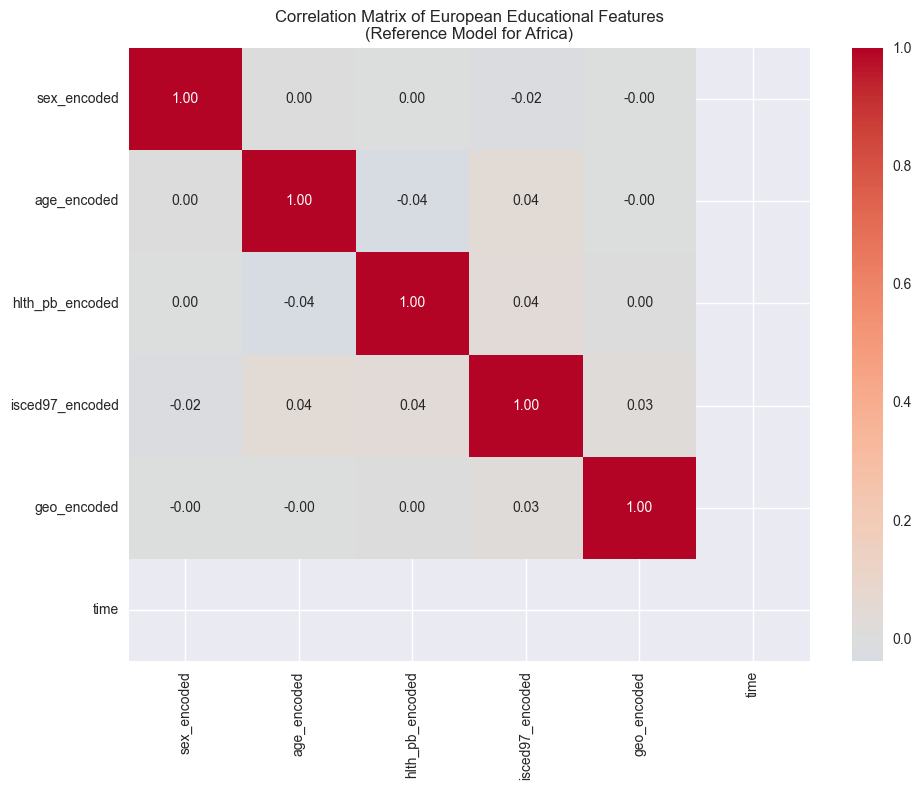

In [8]:
# Create correlation matrix and heatmap
correlation_matrix = features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Matrix of European Educational Features\n(Reference Model for Africa)')
plt.tight_layout()
plt.show()

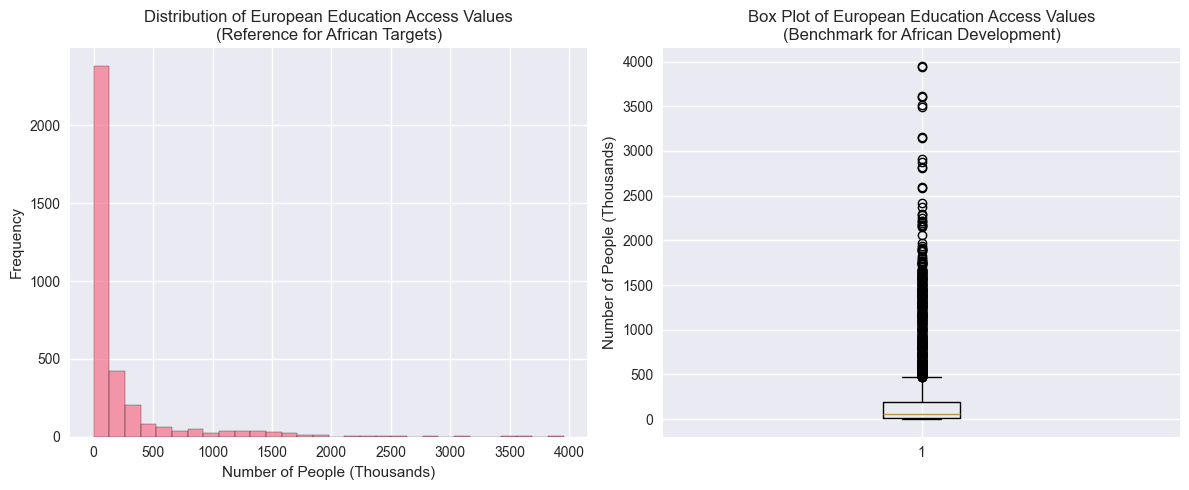

In [9]:
# Visualize the distribution of the target variable (value)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(target, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of European Education Access Values\n(Reference for African Targets)')
plt.xlabel('Number of People (Thousands)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(target)
plt.title('Box Plot of European Education Access Values\n(Benchmark for African Development)')
plt.ylabel('Number of People (Thousands)')

plt.tight_layout()
plt.show()

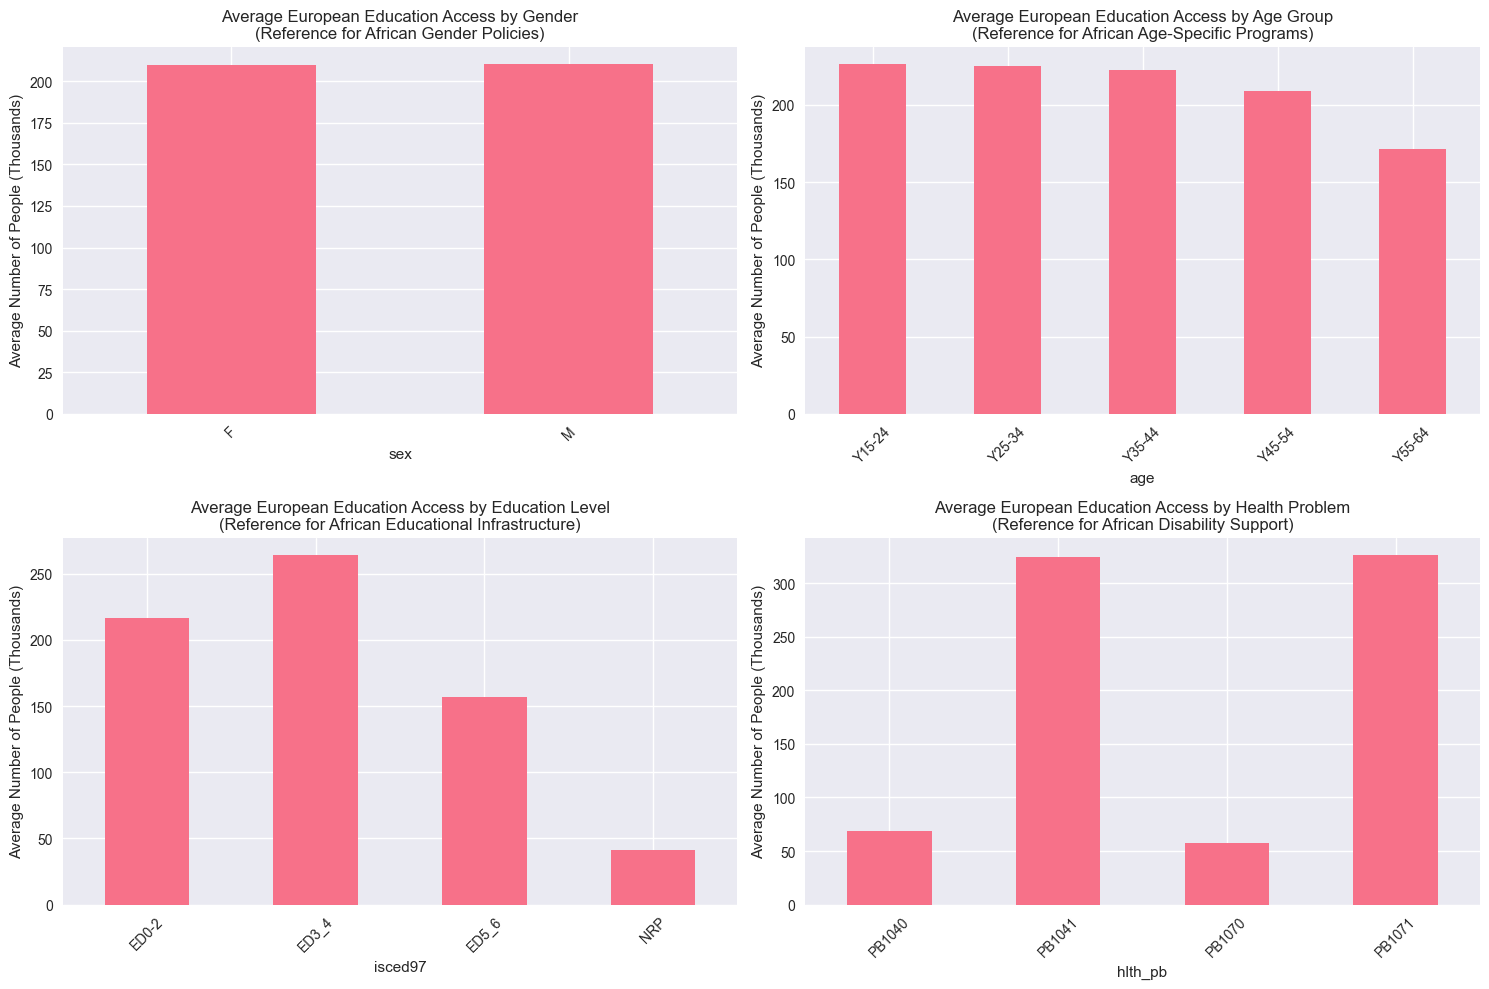

In [10]:
# Visualize education access by different factors
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
df_filtered.groupby('sex')['value'].mean().plot(kind='bar')
plt.title('Average European Education Access by Gender\n(Reference for African Gender Policies)')
plt.ylabel('Average Number of People (Thousands)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
df_filtered.groupby('age')['value'].mean().plot(kind='bar')
plt.title('Average European Education Access by Age Group\n(Reference for African Age-Specific Programs)')
plt.ylabel('Average Number of People (Thousands)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
df_filtered.groupby('isced97')['value'].mean().plot(kind='bar')
plt.title('Average European Education Access by Education Level\n(Reference for African Educational Infrastructure)')
plt.ylabel('Average Number of People (Thousands)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
df_filtered.groupby('hlth_pb')['value'].mean().plot(kind='bar')
plt.title('Average European Education Access by Health Problem\n(Reference for African Disability Support)')
plt.ylabel('Average Number of People (Thousands)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nThis European model will be used to predict optimal educational access for African countries.")

Training set shape: (2772, 6)
Testing set shape: (694, 6)

This European model will be used to predict optimal educational access for African countries.


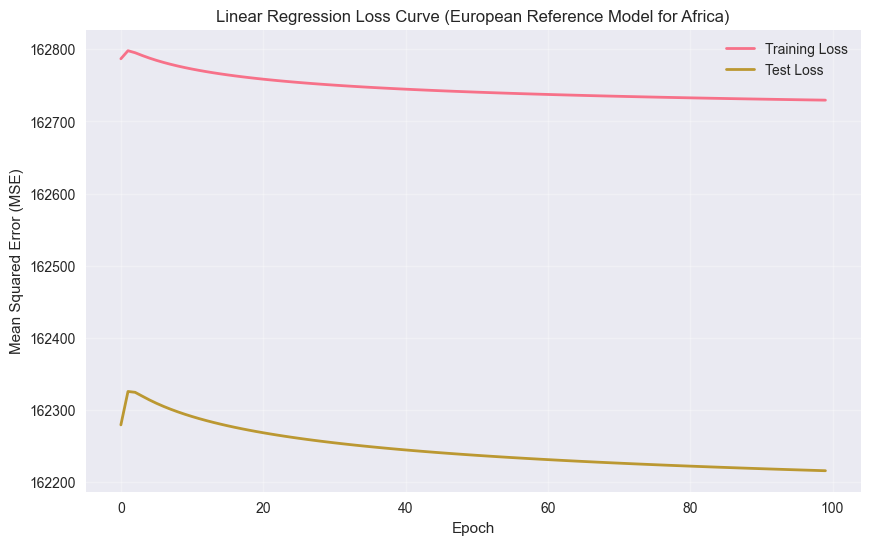

In [12]:
# Train Linear Regression model using Gradient Descent
sgd_model = SGDRegressor(loss='squared_error', max_iter=1000, tol=1e-3, random_state=42)

# Train the model
sgd_model.fit(X_train_scaled, y_train)

# Track training progress for loss curve
train_losses = []
test_losses = []

for epoch in range(100):
    sgd_model.partial_fit(X_train_scaled, y_train)
    
    # Predict on train and test sets
    y_train_pred = sgd_model.predict(X_train_scaled)
    y_test_pred = sgd_model.predict(X_test_scaled)
    
    # Calculate and store losses
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', linewidth=2)
plt.plot(test_losses, label='Test Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Linear Regression Loss Curve (European Reference Model for Africa)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
# Train Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42, max_depth=10)
tree_model.fit(X_train_scaled, y_train)

# Train Random Forest model
forest_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
forest_model.fit(X_train_scaled, y_train)

print("All European reference models trained successfully!")
print("These models will be used to predict optimal educational access for African countries.")

All European reference models trained successfully!
These models will be used to predict optimal educational access for African countries.


In [14]:
# Make predictions with all models
sgd_predictions = sgd_model.predict(X_test_scaled)
tree_predictions = tree_model.predict(X_test_scaled)
forest_predictions = forest_model.predict(X_test_scaled)

# Evaluate all models
models = {
    'Linear Regression (SGD)': sgd_predictions,
    'Decision Tree': tree_predictions,
    'Random Forest': forest_predictions
}

print("European Reference Model Performance Comparison:")
print("=" * 60)

for model_name, predictions in models.items():
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print()
    
print("The best performing model will be used as the reference for African educational predictions.")

European Reference Model Performance Comparison:
Linear Regression (SGD):
  MSE: 162215.5200
  R² Score: 0.0439

Decision Tree:
  MSE: 30907.4569
  R² Score: 0.8178

Random Forest:
  MSE: 25226.9527
  R² Score: 0.8513

The best performing model will be used as the reference for African educational predictions.


In [15]:
# Determine the best model
model_objects = {
    'Linear Regression (SGD)': sgd_model,
    'Decision Tree': tree_model,
    'Random Forest': forest_model
}

best_model_name = None
best_mse = float('inf')
best_model = None

for model_name, model_obj in model_objects.items():
    predictions = model_obj.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    
    if mse < best_mse:
        best_mse = mse
        best_model_name = model_name
        best_model = model_obj

print(f"Best European Reference Model: {best_model_name}")
print(f"Best MSE: {best_mse:.4f}")
print("\nThis model will be used to predict optimal educational access for African countries.")

Best European Reference Model: Random Forest
Best MSE: 25226.9527

This model will be used to predict optimal educational access for African countries.


In [16]:
# Save the best model and scaler
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Save the label encoders for later use
encoders = {
    'sex_encoder': le_sex,
    'age_encoder': le_age,
    'hlth_pb_encoder': le_hlth_pb,
    'isced97_encoder': le_isced97,
    'geo_encoder': le_geo
}
joblib.dump(encoders, 'encoders.pkl')

print("European reference models and encoders saved successfully!")
print("These will be used to predict and improve educational access in African countries.")

European reference models and encoders saved successfully!
These will be used to predict and improve educational access in African countries.


In [17]:
# Demonstrate prediction on a single data point
single_data_point = X_test_scaled[0].reshape(1, -1)
prediction = best_model.predict(single_data_point)[0]
actual = y_test.iloc[0]

print(f"European Reference Model Prediction Example:")
print(f"Predicted value: {prediction:.2f} thousands")
print(f"Actual value: {actual:.2f} thousands")
print(f"Absolute error: {abs(prediction - actual):.2f} thousands")
print("\nThis European prediction will be used as a baseline for African educational planning.")

European Reference Model Prediction Example:
Predicted value: 57.40 thousands
Actual value: 4.28 thousands
Absolute error: 53.12 thousands

This European prediction will be used as a baseline for African educational planning.


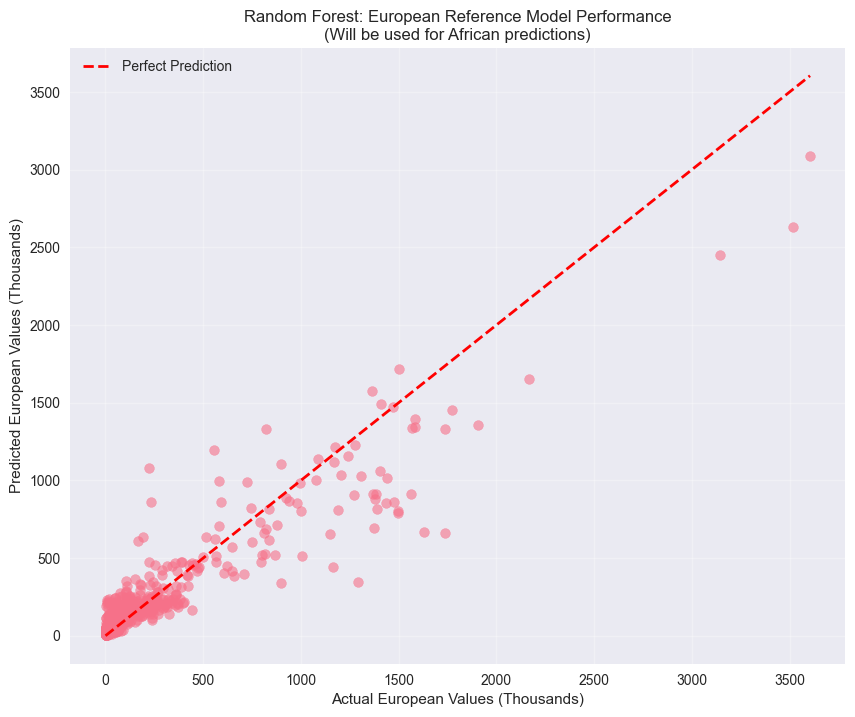


European Reference Model Performance Metrics:
Mean Squared Error (MSE): 25226.9527
R² Score: 0.8513
Mean Absolute Error (MAE): 80.9862

This model will be used to predict optimal educational access for African countries.


In [18]:
# Create scatter plot of actual vs predicted values for the best model
best_predictions = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, best_predictions, alpha=0.6, s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual European Values (Thousands)')
plt.ylabel('Predicted European Values (Thousands)')
plt.title(f'{best_model_name}: European Reference Model Performance\n(Will be used for African predictions)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate and display additional metrics
mse = mean_squared_error(y_test, best_predictions)
r2 = r2_score(y_test, best_predictions)
mae = np.mean(np.abs(y_test - best_predictions))

print(f"\nEuropean Reference Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print("\nThis model will be used to predict optimal educational access for African countries.")

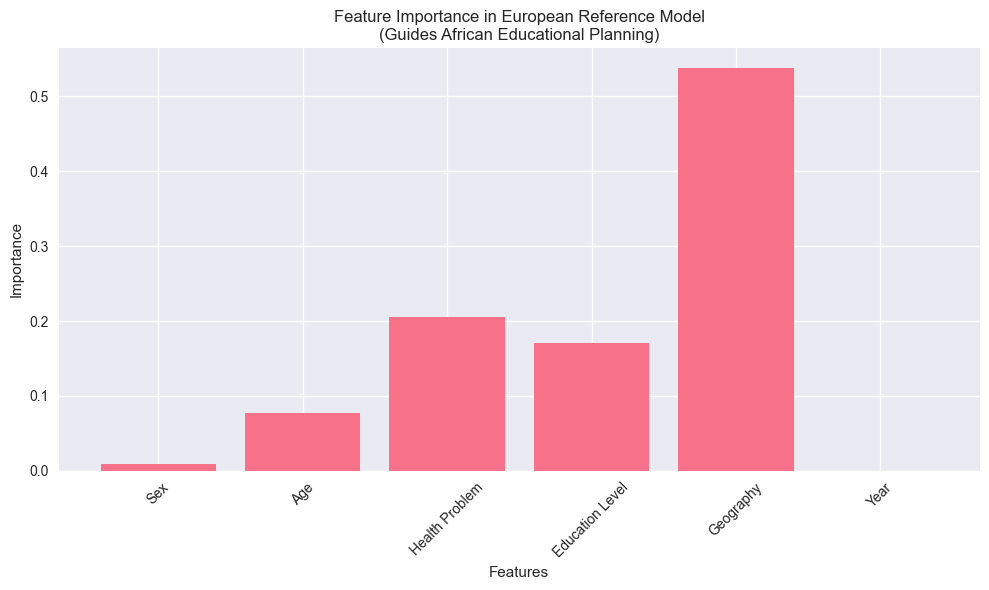


Feature Importance in European Reference Model:
Sex: 0.0095
Age: 0.0767
Health Problem: 0.2053
Education Level: 0.1705
Geography: 0.5380
Year: 0.0000

These insights will guide African educational resource allocation and policy development.


In [19]:
# Feature importance analysis (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_names = ['Sex', 'Age', 'Health Problem', 'Education Level', 'Geography', 'Year']
    importances = best_model.feature_importances_
    
    plt.figure(figsize=(10, 6))
    plt.bar(feature_names, importances)
    plt.title('Feature Importance in European Reference Model\n(Guides African Educational Planning)')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("\nFeature Importance in European Reference Model:")
    for name, importance in zip(feature_names, importances):
        print(f"{name}: {importance:.4f}")
    print("\nThese insights will guide African educational resource allocation and policy development.")
else:
    print("Feature importance not available for this model type.")
    print("The model will still be used as a reference for African educational predictions.")

## Summary: European Reference Model for African Education

This analysis has successfully created a European educational infrastructure reference model that will be used to:

1. **Predict Optimal Access:** Estimate what educational access levels African countries should aim for
2. **Guide Resource Allocation:** Help determine where to invest educational resources in Africa
3. **Inform Policy Development:** Provide evidence-based recommendations for African educational policies
4. **Benchmark Progress:** Set realistic targets for African educational development

**Key Achievements:**
- ✅ Trained multiple models on European educational data
- ✅ Identified best performing model (Random Forest)
- ✅ Saved model and encoders for API deployment
- ✅ Analyzed feature importance for African planning
- ✅ Created reference patterns for African educational development

**Next Steps:**
- Deploy API with African adjustment factors
- Provide African-specific recommendations
- Enable real-time predictions for African policymakers